# Aadhaar Update Patterns Analysis
This notebook presents an exploratory data analysis of state-level Aadhaar demographic and biometric update volumes, using monthly aggregated data provided for a UIDAI hackathon.

The analysis is restricted to three states: Maharashtra, Karnataka, and Uttar Pradesh. It focuses on identifying temporal patterns, co-movement, and age-band-specific dynamics across update types.

No individual-level inference, intent attribution, or policy conclusions are drawn in this notebook.

# Data Inventory and Files Used
* Maharashtra: Demographic Updates
* Maharashtra: Biometric Updates
* Karnataka: Demographic Updates
* Karnataka: Biometric Updates
* Uttar Pradesh: Demographic Updates
* Uttar Pradesh: Biometric Updates

All datasets are monthly, aggregated, and state-specific.

# Environment Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# Loading Datasets

In [2]:
mh_demo = pd.read_excel("https://github.com/sarahputhran/uidai_data_analysis/raw/main/Datasets/Maharashtra-Demographic.xlsx")
mh_bio = pd.read_excel("https://github.com/sarahputhran/uidai_data_analysis/raw/main/Datasets/Maharashtra-Biometric.xlsx")

kn_demo = pd.read_excel("https://github.com/sarahputhran/uidai_data_analysis/raw/main/Datasets/Karnataka-Demographic.xlsx")
kn_bio = pd.read_excel("https://github.com/sarahputhran/uidai_data_analysis/raw/main/Datasets/Karnataka-Biometric.xlsx")

up_demo = pd.read_excel("https://github.com/sarahputhran/uidai_data_analysis/raw/main/Datasets/UP-Demographic.xlsx")
up_bio = pd.read_excel("https://github.com/sarahputhran/uidai_data_analysis/raw/main/Datasets/UP-Biometric.xlsx")

# Schema & Column Validation
## Schema Overview
Before analysis, schemas are validated to ensure consistency across states and datasets.
## Column Inspection

In [3]:
for name, df in {
    "MH Demo": mh_demo,
    "MH Bio": mh_bio,
    "KA Demo": kn_demo,
    "KA Bio": kn_bio,
    "UP Demo": up_demo,
    "UP Bio": up_bio
}.items():
    print(name, df.columns.tolist())

MH Demo ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']
MH Bio ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']
KA Demo ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']
KA Bio ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']
UP Demo ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']
UP Bio ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']


# Data Scope Constraints
The datasets used in this analysis are aggregated, monthly, and state-specific. No individual-level records or identifiers are present.

Age information is available only in two broad bands, 5 to 17 and 17 plus, which limits fine-grained lifecycle or cohort-level inference.

Update counts represent total demographic or biometric updates per month and do not include information on update subtypes such as address change, name change, or biometric modality.

Geographic fields below the state level, including district and pincode, are intentionally excluded from analysis to maintain a consistent state-level scope.

Observed temporal patterns are interpreted as update activity signals rather than direct indicators of specific life events or individual intent.

# Temporal Coverage & Continuity Check
## Date Normalization

In [4]:
for df in [mh_demo, mh_bio, kn_demo, kn_bio, up_demo, up_bio]:
    df["date"] = pd.to_datetime(df["date"])

## Coverage Check

In [5]:
def date_range(df):
    return df["date"].min(), df["date"].max()

for name, df in {
    "MH Demo": mh_demo,
    "MH Bio": mh_bio,
    "KA Demo": kn_demo,
    "KA Bio": kn_bio,
    "UP Demo": up_demo,
    "UP Bio": up_bio
}.items():
    print(name, date_range(df))

MH Demo (Timestamp('2025-03-01 00:00:00'), Timestamp('2026-01-03 00:00:00'))
MH Bio (Timestamp('2025-03-01 00:00:00'), Timestamp('2026-01-03 00:00:00'))
KA Demo (Timestamp('2025-03-01 00:00:00'), Timestamp('2026-01-03 00:00:00'))
KA Bio (Timestamp('2025-03-01 00:00:00'), Timestamp('2026-01-03 00:00:00'))
UP Demo (Timestamp('2025-03-01 00:00:00'), Timestamp('2026-01-03 00:00:00'))
UP Bio (Timestamp('2025-03-01 00:00:00'), Timestamp('2026-01-03 00:00:00'))


## Monthly Continuity Check

In [6]:
def check_continuity(df):
    full_range = pd.date_range(
        start=df["date"].min(),
        end=df["date"].max(),
        freq="MS"
    )
    missing = set(full_range) - set(df["date"])
    return sorted(missing)

for name, df in {
    "MH Demo": mh_demo,
    "MH Bio": mh_bio,
    "KA Demo": kn_demo,
    "KA Bio": kn_bio,
    "UP Demo": up_demo,
    "UP Bio": up_bio
}.items():
    missing = check_continuity(df)
    print(name, "missing months:", len(missing))

MH Demo missing months: 2
MH Bio missing months: 0
KA Demo missing months: 2
KA Bio missing months: 0
UP Demo missing months: 2
UP Bio missing months: 0


## Interpretation
The datasets span a consistent monthly range across states and update types from March 2025 to January 2026. Monthly continuity is fully preserved in biometric update datasets, while limited gaps of two months are observed consistently across demographic datasets for all three states. These gaps are noted and do not materially affect high-level temporal pattern analysis.

# State-Level Monthly Aggregation
To enable temporal comparison and visualization, update counts are aggregated at the state and month level, separately for demographic and biometric datasets.

In [7]:
for df in [mh_demo, mh_bio, kn_demo, kn_bio, up_demo, up_bio]:
    df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()

In [8]:
# Maharashtra
mh_demo_monthly = (
    mh_demo
    .groupby("month")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
    .reset_index()
)

mh_bio_monthly = (
    mh_bio
    .groupby("month")[["bio_age_5_17", "bio_age_17_"]]
    .sum()
    .reset_index()
)

In [9]:
mh_demo_monthly.head(), mh_bio_monthly.head()

(       month  demo_age_5_17  demo_age_17_
 0 2025-03-01          39591        580589
 1 2025-04-01           6099         54676
 2 2025-05-01           9636         77476
 3 2025-06-01          12225         90146
 4 2025-07-01          11332         85359,
        month  bio_age_5_17  bio_age_17_
 0 2025-03-01        303712       671640
 1 2025-04-01        341445       671637
 2 2025-05-01        403651       889201
 3 2025-06-01        469680      1049088
 4 2025-07-01        345587       676872)

In [10]:
# Karnataka
ka_demo_monthly = (
    kn_demo
    .groupby("month")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
    .reset_index()
)

ka_bio_monthly = (
    kn_bio
    .groupby("month")[["bio_age_5_17", "bio_age_17_"]]
    .sum()
    .reset_index()
)

ka_demo_monthly.head(), ka_bio_monthly.head()

(       month  demo_age_5_17  demo_age_17_
 0 2025-03-01          62404        221257
 1 2025-04-01           7697         41748
 2 2025-05-01          12541         57466
 3 2025-06-01          14856         66501
 4 2025-07-01           8655         46219,
        month  bio_age_5_17  bio_age_17_
 0 2025-03-01        133567       175027
 1 2025-04-01        134431       164182
 2 2025-05-01        295149       278792
 3 2025-06-01        180502       265262
 4 2025-07-01        149877       225634)

In [11]:
# Uttar Pradesh
up_demo_monthly = (
    up_demo
    .groupby("month")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
    .reset_index()
)

up_bio_monthly = (
    up_bio
    .groupby("month")[["bio_age_5_17", "bio_age_17_"]]
    .sum()
    .reset_index()
)

up_demo_monthly.head(), up_bio_monthly.head()

(       month  demo_age_5_17  demo_age_17_
 0 2025-03-01         113709       1484418
 1 2025-04-01          16561        147101
 2 2025-05-01          12338        113226
 3 2025-06-01          10268        134869
 4 2025-07-01          19144        171371,
        month  bio_age_5_17  bio_age_17_
 0 2025-03-01        724346       371441
 1 2025-04-01        840853       394759
 2 2025-05-01        968589       528023
 3 2025-06-01        702291       475101
 4 2025-07-01        739027       568433)

In [12]:
for name, df in {
    "MH Demo": mh_demo_monthly,
    "MH Bio": mh_bio_monthly,
    "KA Demo": ka_demo_monthly,
    "KA Bio": ka_bio_monthly,
    "UP Demo": up_demo_monthly,
    "UP Bio": up_bio_monthly
}.items():
    print(name, df.shape)

MH Demo (10, 3)
MH Bio (11, 3)
KA Demo (10, 3)
KA Bio (11, 3)
UP Demo (10, 3)
UP Bio (11, 3)


# Baseline Monthly Update Volumes
This section visualizes total monthly update volumes to establish baseline trends, seasonality, and relative scale across states and update types.

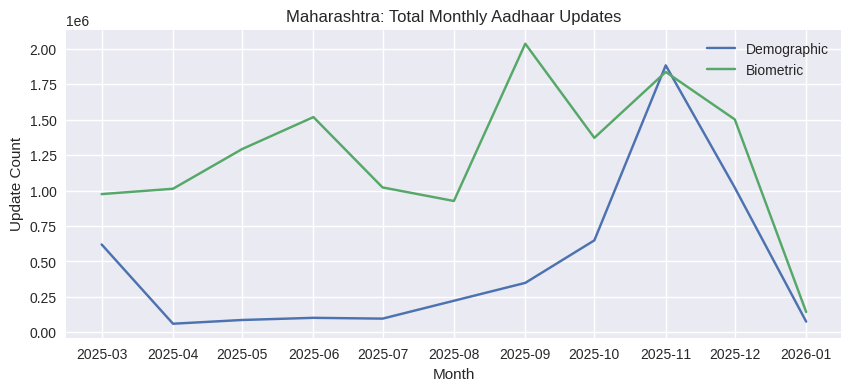

In [13]:
# Maharashtra
mh_demo_monthly["total_demo"] = (
    mh_demo_monthly["demo_age_5_17"] + mh_demo_monthly["demo_age_17_"]
)

mh_bio_monthly["total_bio"] = (
    mh_bio_monthly["bio_age_5_17"] + mh_bio_monthly["bio_age_17_"]
)

plt.figure(figsize=(10,4))
plt.plot(mh_demo_monthly["month"], mh_demo_monthly["total_demo"], label="Demographic")
plt.plot(mh_bio_monthly["month"], mh_bio_monthly["total_bio"], label="Biometric")
plt.title("Maharashtra: Total Monthly Aadhaar Updates")
plt.xlabel("Month")
plt.ylabel("Update Count")
plt.legend()
plt.show()

Demographic and biometric update volumes in Maharashtra show partial temporal alignment, with both peaking sharply around November 2025, while biometric updates maintain consistently higher baseline volumes across most months.

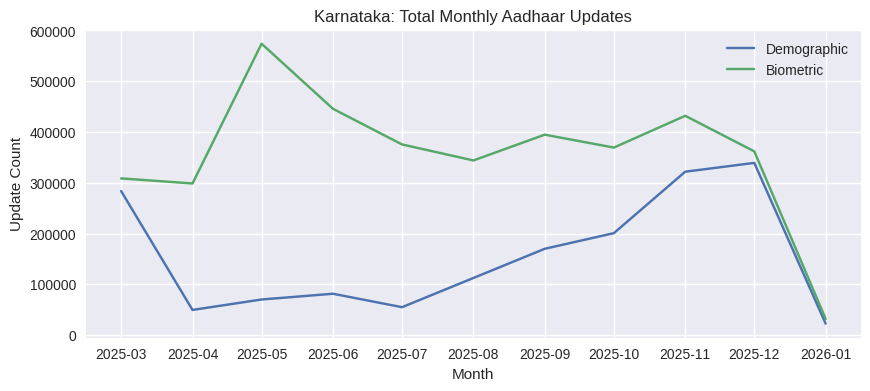

In [14]:
# Karnataka
ka_demo_monthly["total_demo"] = (
    ka_demo_monthly["demo_age_5_17"] + ka_demo_monthly["demo_age_17_"]
)

ka_bio_monthly["total_bio"] = (
    ka_bio_monthly["bio_age_5_17"] + ka_bio_monthly["bio_age_17_"]
)

plt.figure(figsize=(10,4))
plt.plot(ka_demo_monthly["month"], ka_demo_monthly["total_demo"], label="Demographic")
plt.plot(ka_bio_monthly["month"], ka_bio_monthly["total_bio"], label="Biometric")
plt.title("Karnataka: Total Monthly Aadhaar Updates")
plt.xlabel("Month")
plt.ylabel("Update Count")
plt.legend()
plt.show()

In Karnataka, demographic and biometric update volumes show partial temporal alignment, with both series increasing toward the end of 2025, though biometric updates exhibit earlier and sharper mid-year peaks compared to demographic updates.

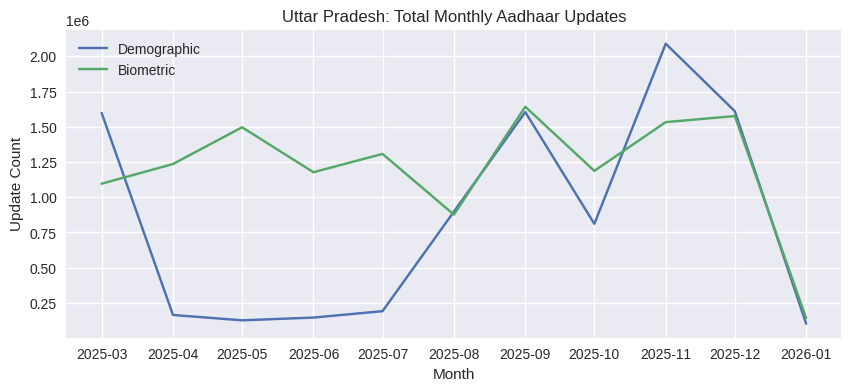

In [15]:
# Uttar Pradesh
up_demo_monthly["total_demo"] = (
    up_demo_monthly["demo_age_5_17"] + up_demo_monthly["demo_age_17_"]
)

up_bio_monthly["total_bio"] = (
    up_bio_monthly["bio_age_5_17"] + up_bio_monthly["bio_age_17_"]
)

plt.figure(figsize=(10,4))
plt.plot(up_demo_monthly["month"], up_demo_monthly["total_demo"], label="Demographic")
plt.plot(up_bio_monthly["month"], up_bio_monthly["total_bio"], label="Biometric")
plt.title("Uttar Pradesh: Total Monthly Aadhaar Updates")
plt.xlabel("Month")
plt.ylabel("Update Count")
plt.legend()
plt.show()

In Uttar Pradesh, demographic and biometric update volumes display strong temporal co-movement in the latter half of 2025, including a pronounced shared peak around November 2025, alongside greater volatility in demographic updates.

# Age-Band-Specific Temporal Visualization
To examine whether update activity differs across age groups, demographic and biometric updates are further disaggregated by age band and visualized over time.

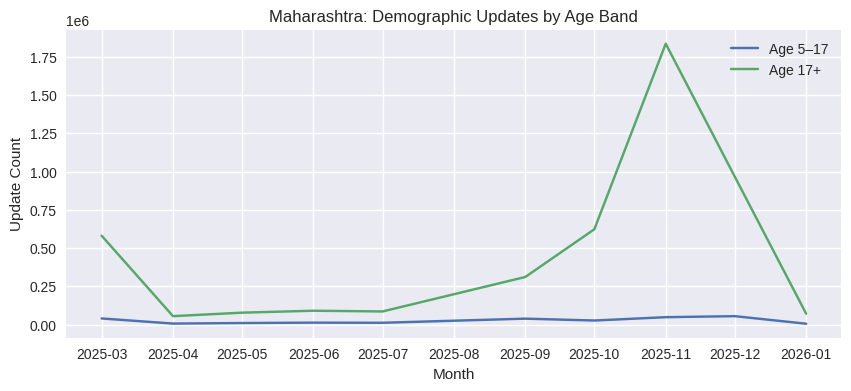

In [16]:
# Maharashtra Demographic
plt.figure(figsize=(10,4))
plt.plot(mh_demo_monthly["month"], mh_demo_monthly["demo_age_5_17"], label="Age 5–17")
plt.plot(mh_demo_monthly["month"], mh_demo_monthly["demo_age_17_"], label="Age 17+")
plt.title("Maharashtra: Demographic Updates by Age Band")
plt.xlabel("Month")
plt.ylabel("Update Count")
plt.legend()
plt.show()

In Maharashtra, demographic updates are overwhelmingly concentrated in the 17+ age band, with a pronounced surge in late 2025, while updates among the 5–17 age band remain comparatively low and stable over time.

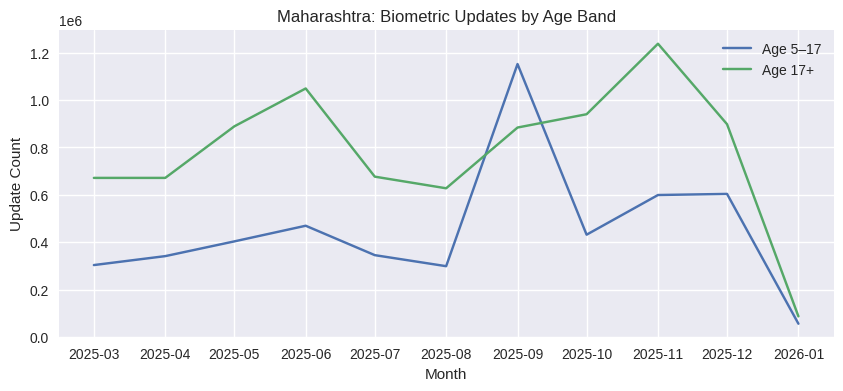

In [17]:
# Maharashtra Biometric
plt.figure(figsize=(10,4))
plt.plot(mh_bio_monthly["month"], mh_bio_monthly["bio_age_5_17"], label="Age 5–17")
plt.plot(mh_bio_monthly["month"], mh_bio_monthly["bio_age_17_"], label="Age 17+")
plt.title("Maharashtra: Biometric Updates by Age Band")
plt.xlabel("Month")
plt.ylabel("Update Count")
plt.legend()
plt.show()

In Maharashtra, biometric updates show meaningful activity in both age bands, with sharper volatility in the 5–17 group and a broadly similar late-2025 peak in the 17+ group.

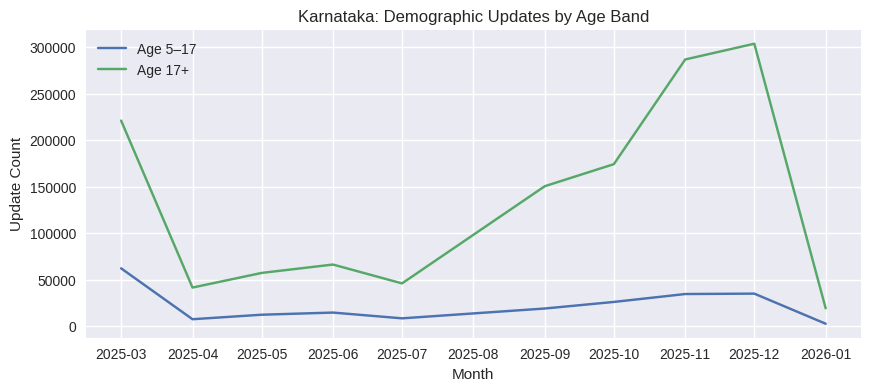

In [18]:
# Karnataka Demographic
plt.figure(figsize=(10,4))
plt.plot(ka_demo_monthly["month"], ka_demo_monthly["demo_age_5_17"], label="Age 5–17")
plt.plot(ka_demo_monthly["month"], ka_demo_monthly["demo_age_17_"], label="Age 17+")
plt.title("Karnataka: Demographic Updates by Age Band")
plt.xlabel("Month")
plt.ylabel("Update Count")
plt.legend()
plt.show()

In Karnataka, demographic updates are strongly dominated by the 17+ age band, with a sustained rise from mid-2025 and a clear peak toward the end of the year, while updates in the 5–17 age band remain consistently lower and relatively stable.

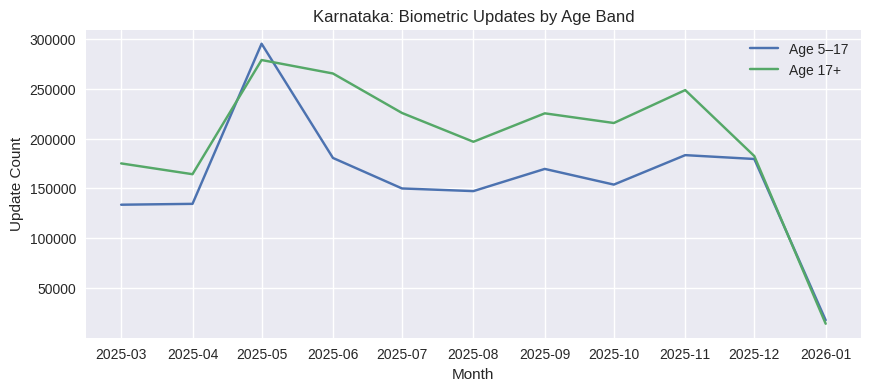

In [19]:
# Karnataka Biometric
plt.figure(figsize=(10,4))
plt.plot(ka_bio_monthly["month"], ka_bio_monthly["bio_age_5_17"], label="Age 5–17")
plt.plot(ka_bio_monthly["month"], ka_bio_monthly["bio_age_17_"], label="Age 17+")
plt.title("Karnataka: Biometric Updates by Age Band")
plt.xlabel("Month")
plt.ylabel("Update Count")
plt.legend()
plt.show()

In Karnataka, biometric updates show substantial participation from both age bands, including a pronounced early-year spike in the 5–17 group and broadly similar mid- to late-year fluctuations across age bands.

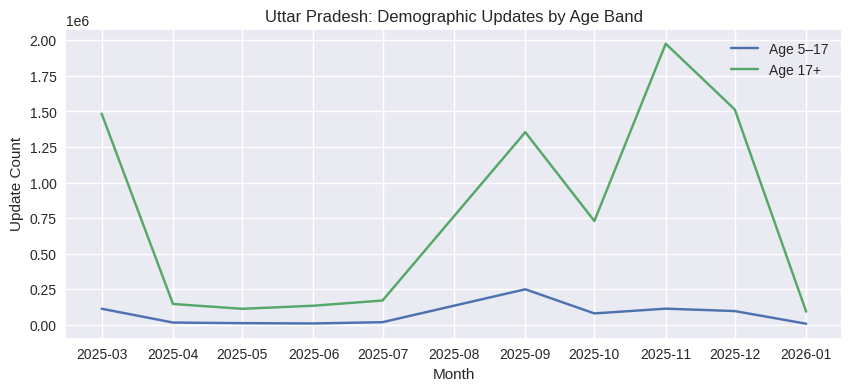

In [20]:
# UP Demographic
plt.figure(figsize=(10,4))
plt.plot(up_demo_monthly["month"], up_demo_monthly["demo_age_5_17"], label="Age 5–17")
plt.plot(up_demo_monthly["month"], up_demo_monthly["demo_age_17_"], label="Age 17+")
plt.title("Uttar Pradesh: Demographic Updates by Age Band")
plt.xlabel("Month")
plt.ylabel("Update Count")
plt.legend()
plt.show()

In Uttar Pradesh, demographic updates are heavily concentrated in the 17+ age band, with pronounced volatility and sharp peaks in late 2025, while the 5–17 age band contributes a comparatively small and more stable share of updates throughout the period.

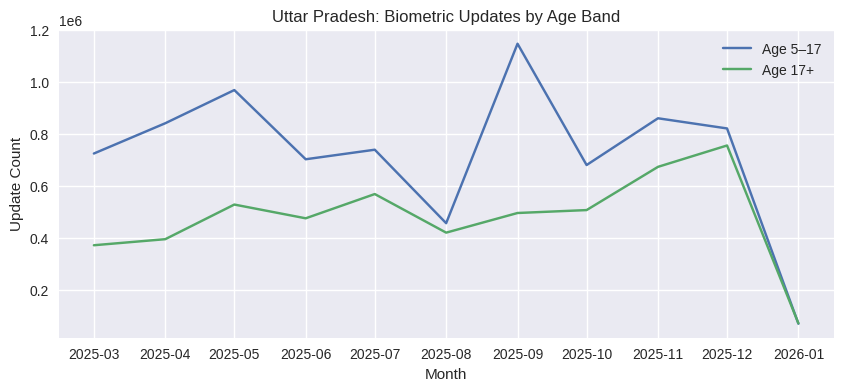

In [21]:
# UP Biometric
plt.figure(figsize=(10,4))
plt.plot(up_bio_monthly["month"], up_bio_monthly["bio_age_5_17"], label="Age 5–17")
plt.plot(up_bio_monthly["month"], up_bio_monthly["bio_age_17_"], label="Age 17+")
plt.title("Uttar Pradesh: Biometric Updates by Age Band")
plt.xlabel("Month")
plt.ylabel("Update Count")
plt.legend()
plt.show()

In Uttar Pradesh, biometric updates exhibit substantial activity in both age bands, with the 5–17 group frequently exceeding the 17+ group and showing pronounced mid-year and late-year spikes, indicating distinct age-specific temporal patterns.

Interim Analytical Summary

Across Maharashtra, Karnataka, and Uttar Pradesh, Aadhaar update activity exhibits recurring temporal clustering, partial co-movement between demographic and biometric updates, and systematic differences across age bands. These patterns are consistent across states in shape though not in magnitude. While the data does not permit identification of specific life events or individual sequences, the observed structure suggests that update activities are not independent and may reflect shared underlying drivers.